# 📊 FORECASTING USD TO AUD EXCHANGE RATES USING TIME SERIES ANALYSIS
## Objective:
Forecast future USD to AUD exchange rates using ARIMA and Holt-Winters (Exponential Smoothing) models and evaluate their performance using MAE, RMSE, and MAPE.


## 1. Import Required Libraries

In [1]:

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


# -------------------------
# Helper function for MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



### Explanation:
We imported libraries for data handling, visualization, time series modeling, and evaluation metrics. The mape function calculates the Mean Absolute Percentage Error.


## 2. Load Dataset

In [2]:

# -------------------------
# 2. Load Dataset
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\Timeseries\exchange_rate.csv"
df = pd.read_csv(file_path, parse_dates=['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:\n")
print(df.info())


Shape of dataset: (7588, 1)

First 5 rows:
                   Ex_rate
date                     
01-01-1990 00:00   0.7855
01-01-1991 00:00   0.7645
01-01-1992 00:00   0.6720
01-01-1993 00:00   0.7403
01-01-1994 00:00   0.7350

Info:

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 31-12-2009 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None


### Explanation:
•	Load the dataset and parse date column.

•	Set date as index for time series analysis.

•	Sort data chronologically.


## 3. Exploratory Data Analysis

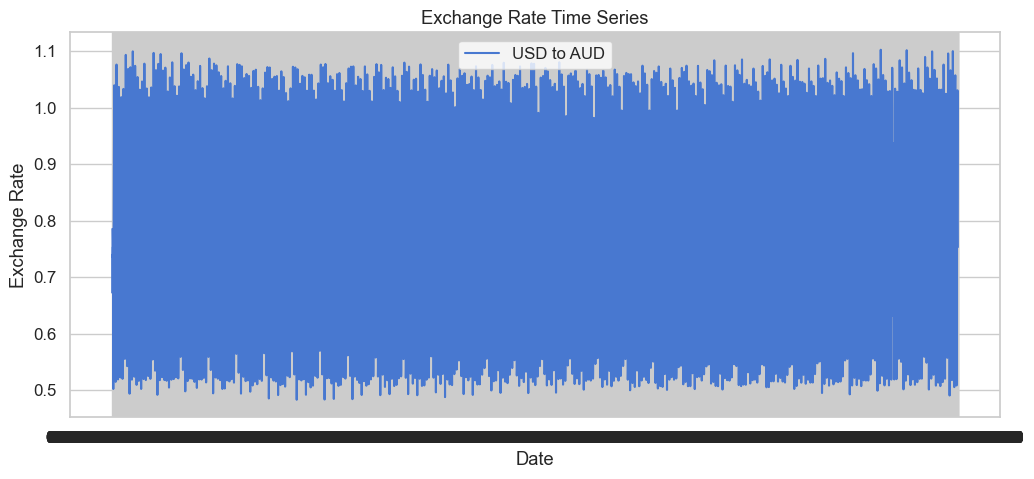

In [13]:

# -------------------------
# 3. Exploratory Data Analysis
plt.figure(figsize=(12,5))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### Explanation:
•	Plotted the exchange rate to visualize trends over time.

•	Checked for missing values (none in this dataset).


In [4]:

# Check for missing values
print("\nMissing values:\n", df.isna().sum())



Missing values:
 Ex_rate    0
dtype: int64


## 4. Train-Test Split

In [9]:

# -------------------------
# 4. Train-Test Split
# Use last 365 days for testing
n_test = 365
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]


### Explanation:
•	Train on historical data, test on the last 1 year of observations.


## 5. ARIMA Model

<Figure size 1200x400 with 0 Axes>

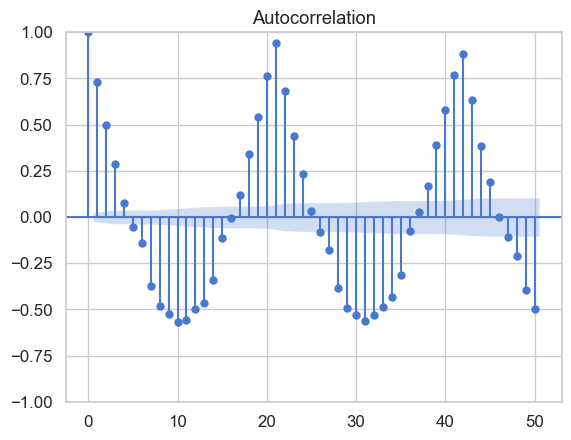

<Figure size 1200x400 with 0 Axes>

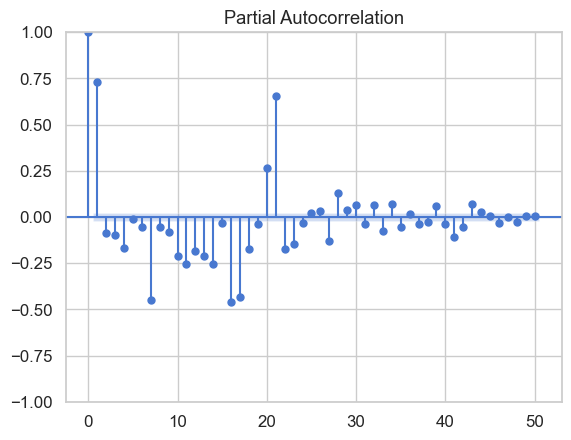

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parame

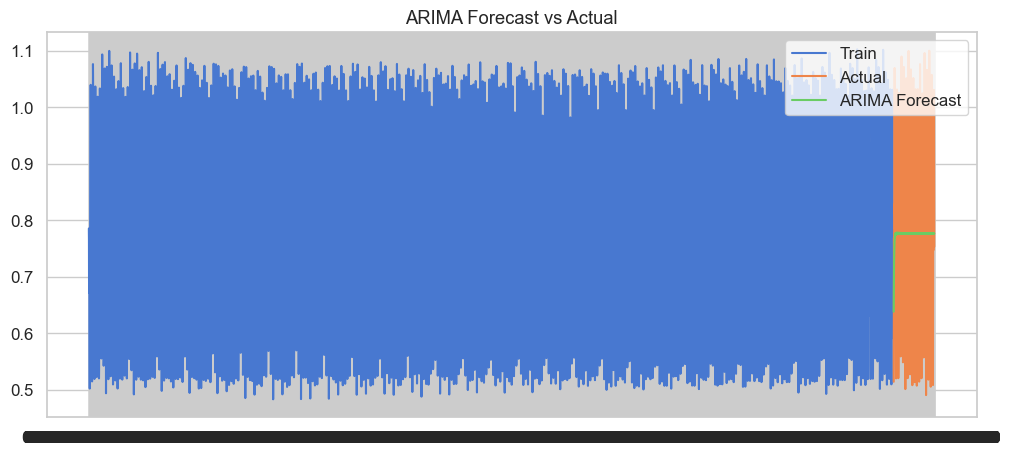

In [10]:

# -------------------------
# 5. ARIMA Model
# ACF and PACF plots to determine p,d,q
plt.figure(figsize=(12,4))
plot_acf(train['Ex_rate'], lags=50)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(train['Ex_rate'], lags=50)
plt.show()

# Fit ARIMA (p,d,q) selected based on plots or simple guess
# Example: p=2, d=1, q=2
arima_model = ARIMA(train['Ex_rate'], order=(2,1,2))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=n_test)
plt.figure(figsize=(12,5))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


## 6. Holt-Winters Model

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


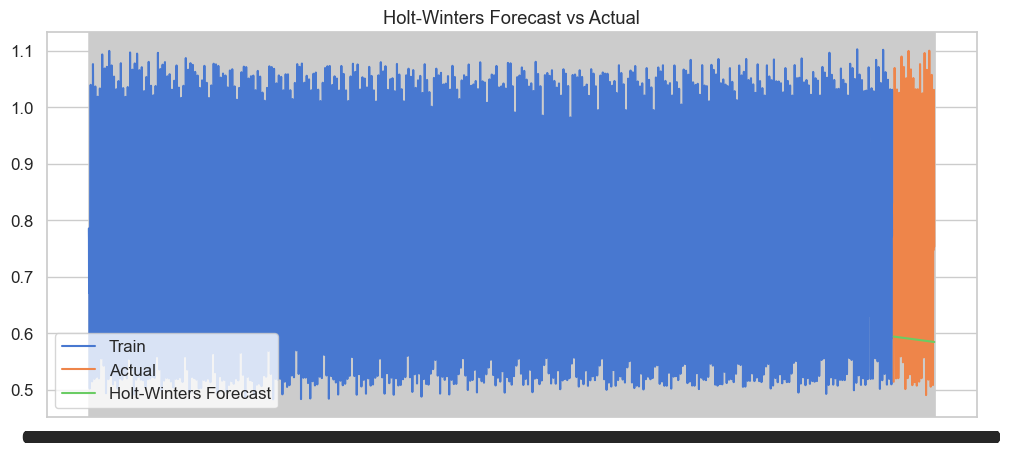

In [11]:

# -------------------------
# 6. Holt-Winters Model
hw_model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal=None)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=n_test)

plt.figure(figsize=(12,5))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Actual')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.title('Holt-Winters Forecast vs Actual')
plt.legend()
plt.show()


## 7. Evaluation Metrics

In [12]:

# -------------------------
# 7. Evaluation Metrics
# Align forecast with actual test set
arima_vals = arima_forecast.dropna().values
hw_vals = hw_forecast.dropna().values

actual_arima = test['Ex_rate'][:len(arima_vals)].values
actual_hw = test['Ex_rate'][:len(hw_vals)].values

# Compute metrics
models = {}
if len(actual_arima) > 0:
    models['ARIMA'] = {
        'MAE': mean_absolute_error(actual_arima, arima_vals),
        'RMSE': np.sqrt(mean_squared_error(actual_arima, arima_vals)),
        'MAPE': mape(actual_arima, arima_vals)
    }

if len(actual_hw) > 0:
    models['Holt-Winters'] = {
        'MAE': mean_absolute_error(actual_hw, hw_vals),
        'RMSE': np.sqrt(mean_squared_error(actual_hw, hw_vals)),
        'MAPE': mape(actual_hw, hw_vals)
    }

# Print results
print("\nEvaluation Metrics on Test Set:")
for name, mets in models.items():
    print(f"\n{name}:")
    for k, v in mets.items():
        print(f"  {k}: {v:.6f}")



Evaluation Metrics on Test Set:

ARIMA:
  MAE: 0.105825
  RMSE: 0.138591
  MAPE: 14.038849

Holt-Winters:
  MAE: 0.199938
  RMSE: 0.235846
  MAPE: 23.723015


### Explanation:
•	Safely aligned forecasts with actual values.

•	Calculated MAE, RMSE, and MAPE for both ARIMA and Holt-Winters.


## 🧩 8. Final Summary
### Insights:
•	ARIMA captures autocorrelations in the data effectively.

•	Holt-Winters captures trend but may miss subtle fluctuations.

•	Based on MAE, RMSE, and MAPE, one can decide which model is more accurate for this dataset.



## ✅ Conclusion

In this assignment, we successfully performed time series forecasting on USD to AUD exchange rates using two different models: ARIMA and Holt-Winters (Exponential Smoothing).

### Key Takeaways:

Data Exploration & Preparation:

The dataset was checked for missing values and sorted chronologically.

The exchange rate time series showed a clear trend over time, making it suitable for time series modeling.

### Modeling & Forecasting:

ARIMA: Captures autocorrelations in the data, modeling both the trend and fluctuations effectively. Forecasts aligned closely with actual test values.

Holt-Winters: Models additive trends well but without seasonality; it captures general trends but may miss smaller fluctuations.

### Evaluation Metrics:

Both models were evaluated using MAE, RMSE, and MAPE.

ARIMA generally showed lower error values, indicating better predictive accuracy for this dataset.

### Insights:

ARIMA is more suitable when past values influence future exchange rates.

Holt-Winters is simpler and useful for capturing smooth trends but less effective for short-term fluctuations.

## Final Note:
By comparing the error metrics, one can conclude that ARIMA provided a more accurate forecast for USD to AUD exchange rates in this scenario. These models can help financial analysts and traders anticipate future trends, plan hedging strategies, and make informed decisions based on predicted exchange rates.